In [3]:
import matplotlib.pyplot as plt

import math as m
import itertools as it
import functools as ft
from shapely.geometry import Polygon
from sympy import Point

from copy import copy
from typing import Tuple, Iterable, Union

### Задание 1
#### Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора

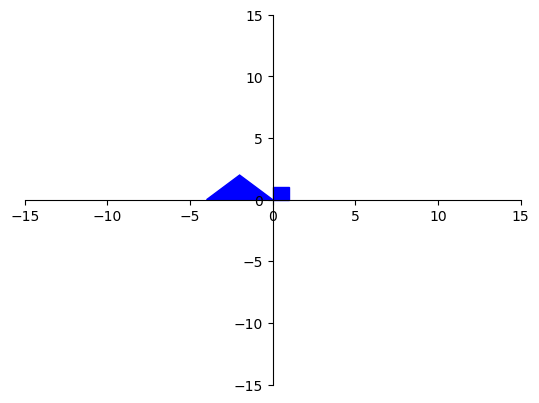

In [19]:
def draw_polygons(coords):
    # Функция для отрисовки фигур на графике. Принимает на вход список координат фигур.
    for shape in coords:
        # Для каждой фигуры в списке координат
        x, y = zip(*shape)
        # Разбираем координаты фигуры на отдельные списки x и y координат
        plt.fill(x, y, color='blue')
        # .fill - Заполняем внутреннюю область фигуры синим цветом
        # plt = matplotlib.pyplot
    xy = plt.gca()
    # Получаем текущие оси графика
    xy.spines['left'].set_position('zero')
    # Перемещаем левую ось графика на ноль (начало координат)
    xy.spines['bottom'].set_position('zero')
    # Перемещаем нижнюю ось графика на ноль (начало координат)
    xy.spines['right'].set_color('none')
    # Убираем правую ось графика
    xy.spines['top'].set_color('none')
    # Убираем верхнюю ось графика
    plt.xlim((-15, 15))
    # Устанавливаем пределы по оси x от -15 до 15
    plt.ylim((-15, 15))
    # Устанавливаем пределы по оси y от -15 до 15
    
# Пример:
coord = iter((
    # Создаем итератор для перебора фигур
    ((-4, 0), (-2, 2), (0, 0)),
    # Координаты вершин первой фигуры: треугольника
    ((0, 0), (1, 0), (1, 1), (0, 1))))
    # Координаты вершин второй фигуры: квадрата
draw_polygons(coord)
# Вызываем функцию для отрисовки переданных фигур

### Задание 2
#### Реализовать функции, генерирующие бесконечную последовательность не пересекающихся полигонов с различающимися координатами


##### 1. прямоугольников ( gen_rectangle() );

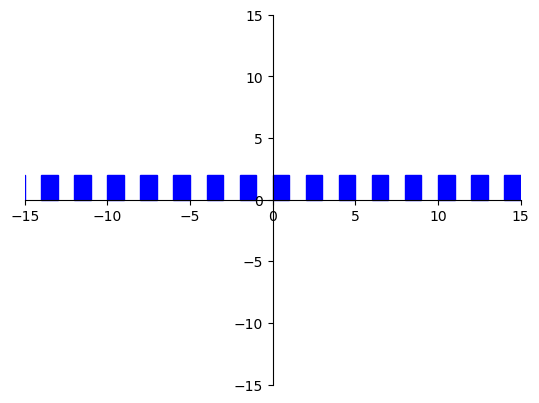

In [29]:
def gen_rectangle(length=2, width=2, start=-25, count=100):
    # rectangle - прямугольник с англ.
    # Определяем функцию gen_rectangle, которая генерирует прямоугольные координаты.
    # По умолчанию задаем длину и ширину прямоугольника равными 2,
    # начальную координату x равной -25 и количество прямоугольников равным 100.
    
    x1 = it.islice(it.count(start, length), count)
    # it = itertools
    # Используем it.islice для ограничения количества координат заданным числом.
    # it.count - список с арифметической прогрессией
    # Генерируем координаты x для левого верхнего угла прямоугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине прямоугольника.
    
    x2 = it.islice(it.count(start - 1, length), count)
    # Генерируем координаты x для правого верхнего угла прямоугольника,
    # начиная с заданной начальной координаты минус 1 и с тем же шагом, равным длине прямоугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(width), count)
    # Генерируем координаты y для верхней грани прямоугольника,
    # повторяя значение ширины прямоугольника заданное количество раз.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для нижней грани прямоугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return (
        ((_x1, _y1), (_x2, _y1), (_x2, _y2), (_x1, _y2))
        for _x1, _x2, _y1, _y2 in zip(x1, x2, y1, y2)
    )
    # Возвращаем генератор, который выдает кортежи с координатами вершин прямоугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.

draw_polygons(gen_rectangle())

##### 2. треугольников ( gen_triangle() );

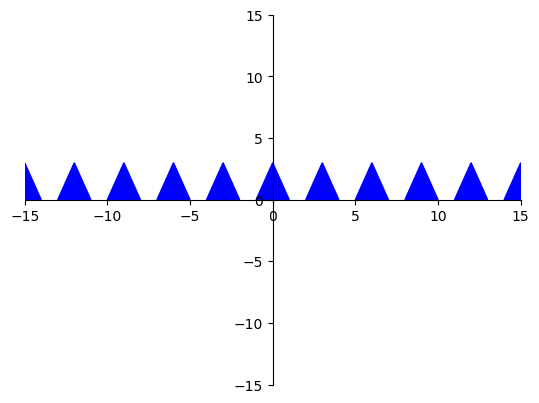

In [30]:
def gen_triangle(length=3, height=3, start=-25, count=100):    
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника,
    # начиная с заданной начальной координаты плюс 2 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника,
    # повторяя значение высоты треугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.
    
draw_polygons(gen_triangle())

##### 3. правильных шестиугольников ( gen_hexagon() ).

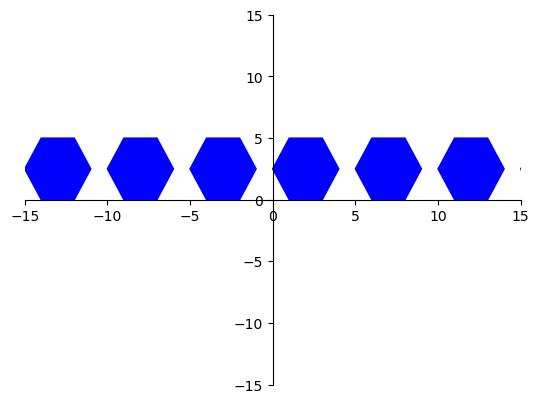

In [36]:
def gen_hexagon(length=5, height=5, start=-25, count=100):
    x1 = it.islice(it.count(start=start, step=length), count)
    # Генерируем координаты x для первой вершины шестиугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине шестиугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    # Генерируем координаты x для второй вершины шестиугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине шестиугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start=start + 3, step=length), count)
    # Генерируем координаты x для третьей вершины шестиугольника,
    # начиная с заданной начальной координаты плюс 3 и с тем же шагом, равным длине шестиугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x4 = it.islice(it.count(start=start + 4, step=length), count)
    # Генерируем координаты x для четвертой вершины шестиугольника,
    # начиная с заданной начальной координаты плюс 4 и с тем же шагом, равным длине шестиугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани шестиугольника,
    # повторяя значение высоты шестиугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для нижней грани шестиугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y3 = iter([i / 2 for i in copy(y1)])
    # Генерируем координаты y для средней грани шестиугольника,
    # деля значение высоты шестиугольника пополам для каждого элемента.
    
    itr = []    
    for _ in range(count):        
        _x1, _x2, _x3, _x4 = next(x1), next(x2), next(x3), next(x4)
        # Берем следующие значения координат x для всех четырех вершин
        
        _y1, _y2, _y3 = next(y1), next(y2), next(y3)
        # Берем следующие значения координат y для всех трех граней
        
        itr.append(list(zip((_x1, _x2, _x3, _x4, _x3, _x2), (_y3, _y1, _y1, _y3, _y2, _y2))))
        # Формируем координаты вершин шестиугольника и добавляем их в список
        
    return itr
    # Возвращаем список с координатами вершин для всех шестиугольников
    
draw_polygons(gen_hexagon())

##### 4. с помощью данных функций используя функции из модуля itertools сгенерировать 7 фигур, включающих как прямоугольники, 
##### так и треугольники и шестиугольники, визуализировать результат.

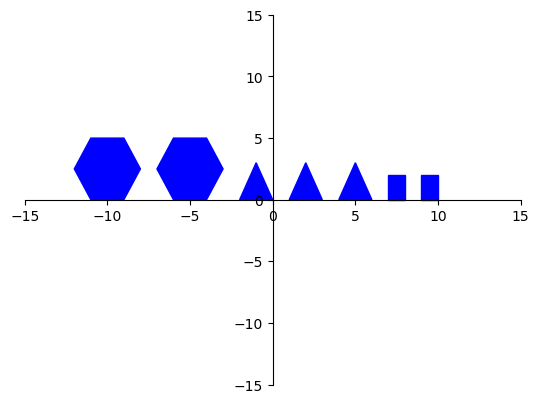

In [12]:
draw_polygons(gen_rectangle(start=8, count=2))
draw_polygons(gen_triangle(start=-2, count=3))
draw_polygons(gen_hexagon(start=-12, count=2))

### Задание 3
Реализовать операции: 

1. параллельный перенос ( tr_translate );

In [41]:
def tr_translate(coordinates, move_y=6, move_x=0):
    # Создаем пустой список fig, в который будем добавлять координаты перемещенных фигур
    fig = []
    # Для каждой фигуры в списке координат
    for figure in coordinates:
        # Распаковываем координаты x и y из текущей фигуры
        x, y = zip(figure)
        # Перемещаем все y-координаты вверх на значение move_y
        y = [_y + move_y for _y in y]
        # Перемещаем все x-координаты вправо на значение move_x
        x = [_x + move_x for _x in x]
        # Для каждой пары (x, y) координат добавляем их в список fig
        for x, y in zip(x, y):
            fig.append((x, y))
    # Возвращаем список fig с перемещенными координатами
    return fig

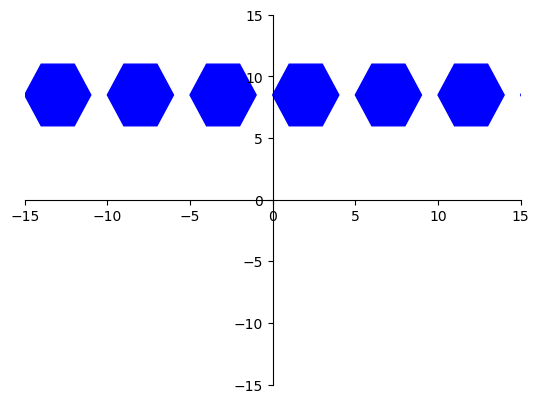

In [42]:
draw_polygons(map(tr_translate, gen_hexagon()))

2. поворот ( tr_rotate )

In [43]:
def tr_rotate(coordinates, angle=30):
    # Создаем пустой список n, в который будем добавлять координаты повернутых точек
    n = []
    # Для каждой точки в списке координат
    for point in coordinates:
        # Распаковываем координаты x и y из текущей точки
        x, y = point
        # Вычисляем косинус угла
        cos = m.cos(m.radians(angle))
        # Вычисляем синус угла
        sin = m.sin(m.radians(angle))
        # Вычисляем новую x-координату после поворота
        _x = x * cos - y * sin
        # Вычисляем новую y-координату после поворота
        _y = x * sin + y * cos
        # Добавляем новую точку с повернутыми координатами в список n
        n.append((_x, _y))
    # Возвращаем список n с повернутыми координатами
    return n

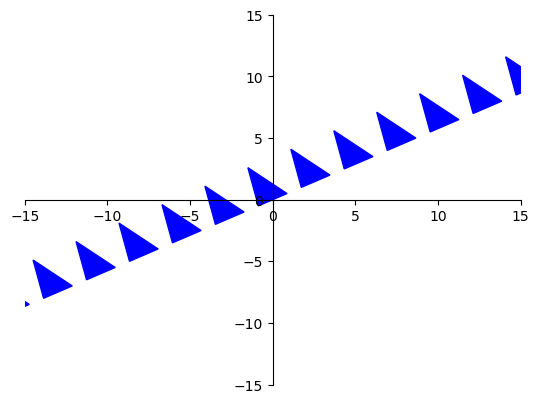

In [44]:
draw_polygons(map(tr_rotate, gen_triangle()))

3. симметрия ( tr_symmetry )

In [45]:
def tr_symmetry(coordinates):
    # Создаем отображение смещения точек вверх
    # Используем ft.partial, чтобы зафиксировать значения аргументов move_up и move_sideways
    # move_y устанавливаем в -7.5 для смещения вверх 
    n = map(ft.partial(tr_translate, move_y=-7.5), [coordinates])
    # Поворачиваем фигуру на 180 градусов
    # Используем ft.partial для зафиксирования значения аргумента angle на 180 градусов
    # Применяем поворот ко всем точкам, полученным после смещения
    result = [i for i in map(ft.partial(tr_rotate, angle=180), n)][0]
    return result

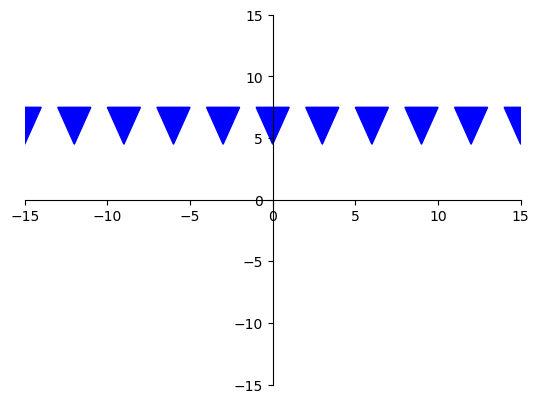

In [46]:
draw_polygons(map(tr_symmetry, gen_triangle()))

4. гомотетия ( tr_homothety )

In [21]:
def tr_homothety(coordinates, k=2.5):
    # Инициализируем пустой список fig, в который будем добавлять координаты гомотетии фигур
    fig = []
    # Для каждой фигуры в списке координат
    for figure in coordinates:
        # Распаковываем координаты x и y из текущей фигуры
        x, y = zip(figure)
        # Умножаем все x-координаты на коэффициент масштабирования k
        x_ = [_x * k for _x in x]
        # Умножаем все y-координаты на коэффициент масштабирования k
        y_ = [_y * k for _y in y]
        # Для каждой пары (x, y) координат добавляем их в список fig
        for x, y in zip(x_, y_):
            fig.append((x, y))
    # Возвращаем список fig с координатами фигур после гомотетии
    return fig

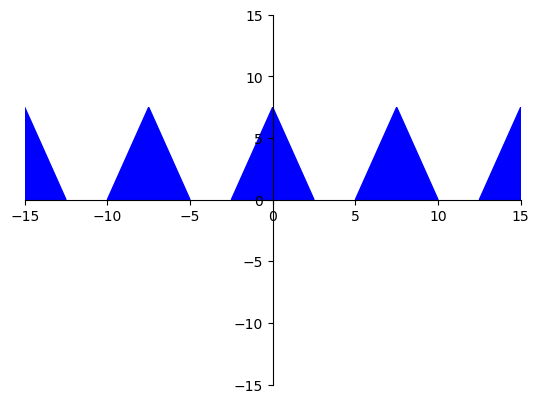

In [22]:
draw_polygons(map(tr_homothety, gen_triangle()))

### Задание 4
С помощью данных функций создать и визуализировать:

1. 3 параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси x;

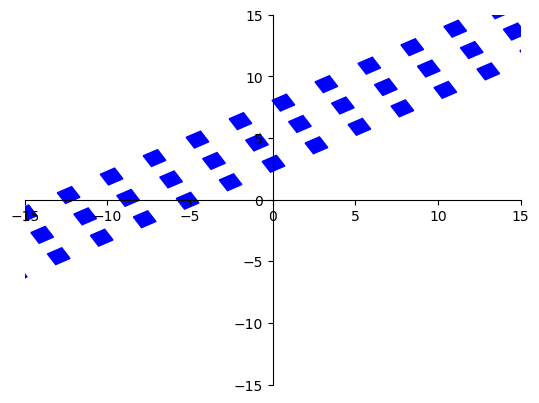

In [23]:
draw_polygons(map(tr_rotate, map(tr_translate, gen_rectangle(length=3, width=1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_y=2), gen_rectangle(3, 1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_y=4), gen_rectangle(3, 1))))

2. две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

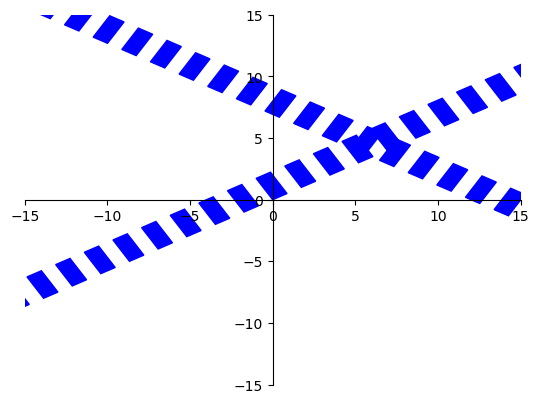

In [24]:
draw_polygons(map(tr_rotate, gen_rectangle()))
draw_polygons(map(ft.partial(tr_rotate, angle=-30), map(tr_translate, gen_rectangle())))

3. две параллельных ленты треугольников, ориентированных симметрично друг к другу;

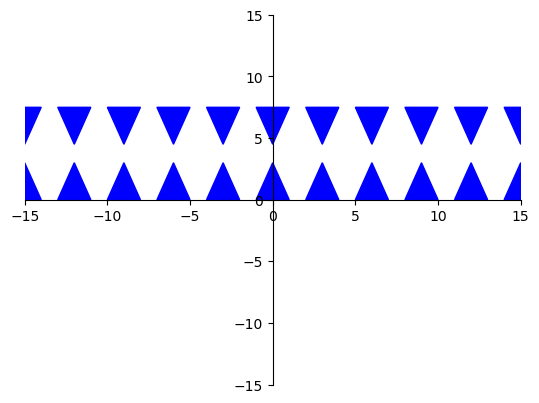

In [25]:
draw_polygons(gen_triangle())
draw_polygons(map(tr_symmetry, gen_triangle()))

4. последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале
координат

In [36]:
#создаем отдельную функцию для прорисовки таких четырехугольников
def draw_homothety(coordinates, n):
    # Если n равно 0, завершаем рекурсию
    if n == 0:
        return
    # Создаем список координат, потому что итератор одноразовый
    coord = list(coordinates)
    # Рисуем фигуры, соответствующие текущему уровню рекурсии
    draw_polygons(coord)
    # Применяем гомотетию ко всем фигурам в списке
    coord = map(tr_homothety, coord)
    # Рекурсивно вызываем функцию для отрисовки следующего уровня гомотетии
    draw_homothety(coord, n - 1)

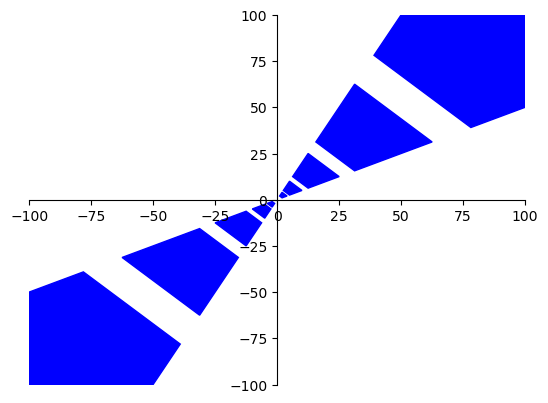

In [37]:
coord = iter((
    ((1, 2), (2, 4), (4, 2), (2, 1)),
    ((-1, -2), (-2, -4), (-4, -2), (-2, -1))
))

draw_homothety(coord, 5)

plt.xlim(-100, 100)
plt.ylim(-100, 100);

### Задание 5
Реализовать операции: 

1. фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon )

In [43]:
def flt_convex_polygon(coordinates):
    # Создаем многоугольник из заданных вершин
    polygon = Polygon(coordinates)
    # Сравниваем многоугольник с его выпуклой оболочкой (convex_hull.equals)
    # Если True, то многоугольник является выпуклым
    if polygon.convex_hull.equals(polygon):
        return True
    return False

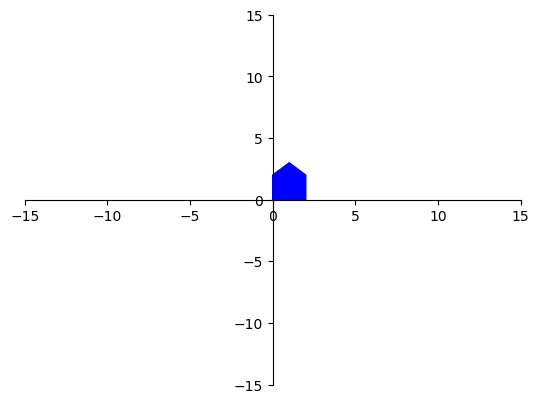

In [44]:
coord = iter((
    # Создаем итератор для перебора фигур
    ((0, 0), (2, 0), (2, 2), (1, 3), (0, 2)),
    # Координаты вершин первой фигуры: выпуклого многоугольника
    ((-5, 0), (-3, 0), (-4, 1), (-3, 2), (-5, 2))))
    # Координаты вершин второй фигуры: невыпуклого многоугольника
draw_polygons(filter(flt_convex_polygon, coord))

2. фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой ( flt_angle_point );

In [45]:
def flt_angle_point(coordinates, point_m = (0, 0)) :
    # Функция flt_angle_point принимает список координат (coordinates) и необязательный аргумент - точку (point_m), 
    # которая по умолчанию равна (0, 0). Функция проверяет, содержится ли точка point_m в списке coordinates (в углах).
    
    for point in coordinates:
        # Для каждой точки в списке координат...
        
        if point == point_m:
            # ...проверяем, равна ли эта точка точке point_m.
            
            return True
            # Если да, возвращаем True, что означает наличие точки point_m в списке coordinates.
            
    return False
    # Если цикл завершился, и не было найдено соответствия точке point_m в списке coordinates, 
    # возвращаем False, что означает отсутствие точки point_m в списке coordinates.

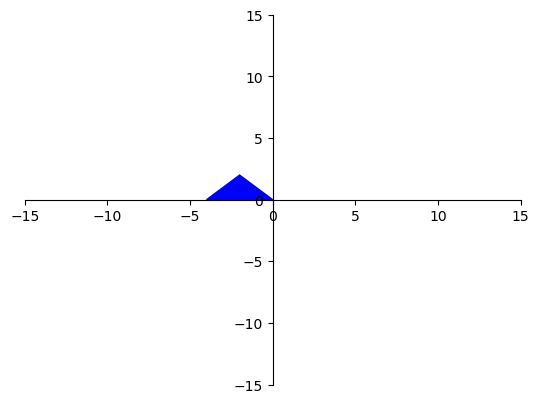

In [46]:
coord = iter((
    # Создаем итератор для перебора фигур
    ((-4, 0), (-2, 2), (0, 0)),
    # Координаты вершин первой фигуры: имеющей точку (0,0)
    ((2, 0), (3, 0), (3, 1), (2, 1))))
    # Координаты вершин второй фигуры: не имеющей точку (0,0)
draw_polygons(filter(flt_angle_point, coord))

3. фильтрации фигур, имеющих площадь менее заданной ( flt_square )

In [47]:
def flt_square(coordinates, area = 2):
    # Функция flt_square принимает список координат (coordinates) и необязательный порог площади (area), 
    # который по умолчанию равен 2.
    
    return True if Polygon(coordinates).area > area else False
    # Создаем объект Polygon из библиотеки shapely, используя переданные координаты.
    # Проверяем, больше ли площадь этой фигуры, чем заданный порог.
    # Если да, возвращаем True, иначе возвращаем False.

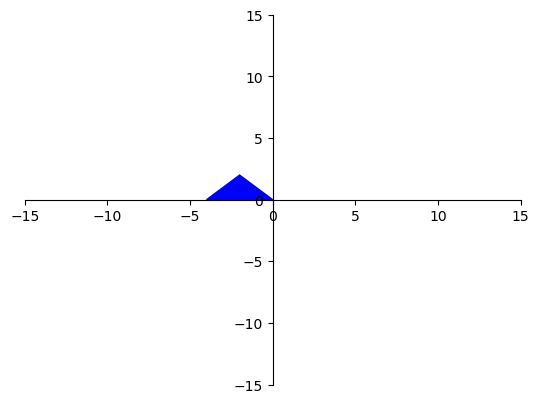

In [48]:
coord = iter((
    # Создаем итератор для перебора фигур
    ((-4, 0), (-2, 2), (0, 0)),
    # Координаты вершин первой фигуры: площадь > 2
    ((2, 0), (3, 0), (3, 1), (2, 1))))
    # Координаты вершин второй фигуры: площадь <= 2
draw_polygons(filter(flt_square, coord))

4. фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side )

In [53]:
def flt_short_side(coordinates, side=1):
    # Функция flt_short_side принимает список координат (coordinates) и необязательный аргумент - минимальную длину стороны (side), 
    # которая по умолчанию равна 1.
    
    shortest_side = None
    # Инициализируем переменную shortest_side с уникальным значением, чтобы обеспечить ее обновление на более короткую сторону.
    
    for fp in coordinates:
        # Перебираем каждую точку в списке координат.
        
        x1, y1 = fp
        # Извлекаем координаты первой точки.
        
        for sp in coordinates:
            # Перебираем каждую точку второй раз, чтобы сравнить все возможные комбинации точек.
            
            x2, y2 = sp
            # Извлекаем координаты второй точки.
            
            if (x1, y1) == (x2, y2): continue
            # Пропускаем точки, если они совпадают.
            
            side_ = (((x1 - x2) ** 2) + ((y1 - y2) ** 2)) ** 0.5
            # Вычисляем длину стороны между двумя точками по формуле расстояния в 2D пространстве.
            
            if shortest_side == None:
                shortest_side = side_
            # Если это первая найденная сторона, устанавливаем ее как самую короткую.
            
            if side_ < shortest_side:
                shortest_side = side_
            # Обновляем переменную shortest_side, если находим более короткую сторону.
    if shortest_side < side:
        # Если самая короткая сторона меньше, чем заданная минимальная сторона, возвращаем True.
        return True
    # В противном случае возвращаем False.
    return False


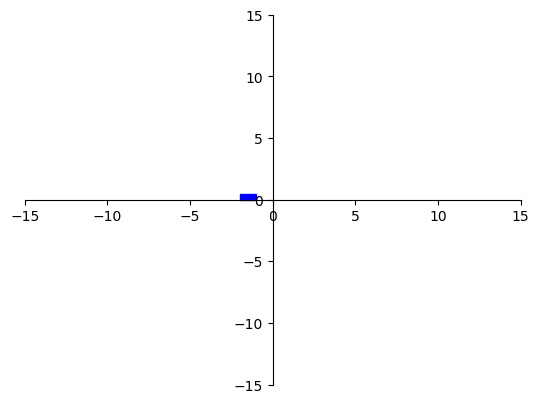

In [54]:
coord = iter((
    # Создаем итератор для перебора фигур
    ((-4, 0), (-2, 2), (0, 0)),
    # Координаты вершин первой фигуры: все стороны > 1
    ((-2, 0), (-1, 0), (-1, 0.5), (-2, 0.5))))
    # Координаты вершин второй фигуры: одна из сторон < 1
draw_polygons(filter(flt_short_side, coord))

5. фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside )

In [55]:
def flt_point_inside(coordinates, point=(0, 0)):
    # Функция flt_point_inside принимает список координат (coordinates) и необязательный аргумент - точку (point), 
    # которая по умолчанию равна (0, 0).
    if flt_convex_polygon(coordinates):
        # Проверяем, является ли фигура, образованная переданными координатами, выпуклым многоугольником.
        x, y = zip(*coordinates)
        # Разделяем координаты x и y из списка координат.
        x_max, x_min = max(x), min(x)
        y_max, y_min = max(y), min(y)
        # Находим максимальные и минимальные значения координат x и y.
        return x_min <= point[0] <= x_max and y_min <= point[1] <= y_max
        # Проверяем, находится ли точка внутри прямоугольной области, ограниченной координатами многоугольника.
    return False

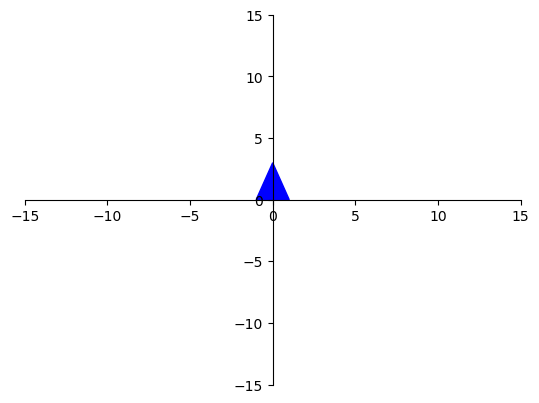

In [56]:
draw_polygons(filter(flt_point_inside, gen_triangle()))

6. фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside);

In [57]:
def flt_polygon_angles_inside(coordinates, polygon=((0, 0), (0, 1), (1, 1), (1, 0))):
    # Функция flt_polygon_angles_inside принимает список координат (coordinates) и необязательный аргумент - многоугольник (polygon), 
    # который по умолчанию является квадратом с координатами (0, 0), (0, 1), (1, 1), (1, 0).
    
    if flt_convex_polygon(coordinates):
        # Проверяем, является ли фигура, образованная переданными координатами, выпуклым многоугольником.
        
        x, y = zip(*coordinates)
        # Разделяем координаты x и y из списка координат.
        
        x_max, x_min = max(x), min(x)
        y_max, y_min = max(y), min(y)
        # Находим максимальные и минимальные значения координат x и y.
        
        for point in polygon:
            # Для каждой точки в переданном многоугольнике...
            
            if x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
                # Проверяем, находится ли эта точка внутри прямоугольной области, ограниченной координатами многоугольника.
                
                return True
                # Если нашли хотя бы одну точку из многоугольника внутри ограничивающего прямоугольника, возвращаем True.
                
    return False
    # Если фигура не является выпуклым многоугольником или не нашли ни одной точки из многоугольника внутри прямоугольника, возвращаем False.

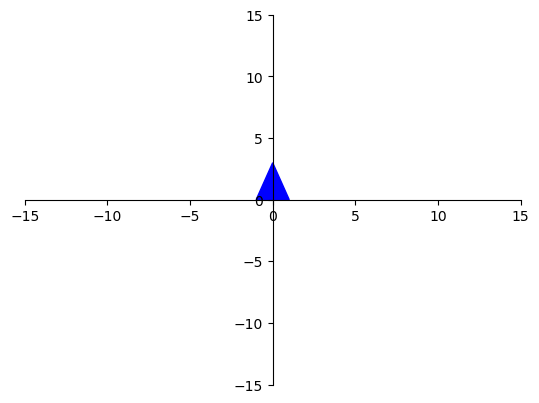

In [58]:
draw_polygons(filter(flt_polygon_angles_inside, gen_triangle()))

### Задание 6
С помощью данных функций реализовать и визуализировать:

2. используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур, которые имеют различный масштаб и
выбрать из них (подбором параметра фильтрации) не более 4х фигур, имеющих кратчайшую сторону менее заданного
значения;

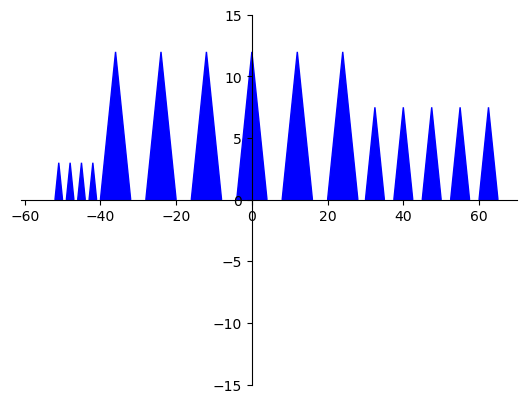

In [59]:
# это просто подбор
# Рисование множества треугольников, полученных с помощью преобразования гомотетии
draw_polygons(map(tr_homothety, gen_triangle(start=12, count=5)))
# Рисование множества треугольников, полученных с помощью генератора gen_triangle
draw_polygons(gen_triangle(start=-52, count=4))
# Рисование множества треугольников, полученных с помощью преобразования гомотетии с коэффициентом k=4
draw_polygons(map(ft.partial(tr_homothety, k=4), gen_triangle(start=-10, count=6)))
# Установка пределов оси x на графике
plt.xlim(-61, 70)
# Отображение графика
plt.show()

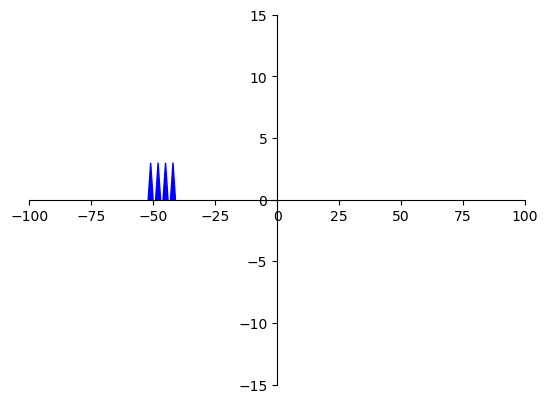

In [60]:
n = [map(tr_homothety, gen_triangle(start=12, count=5)), gen_triangle(start=-52, count=4),
       map(ft.partial(tr_homothety, k=4), gen_triangle(start=-10, count=6))]
for i in n:
    draw_polygons(filter(ft.partial(flt_short_side, side=5), i)) #фильтруем по фигурам имеющих кратчайшую сторону менее заданного значения
plt.xlim(-100, 100) #меняем маштаб
plt.show()

### Задание 7
7. Реализовать декораторы и продемонстрировать корректность их работы:

Преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 3  (@tr_translate)

In [82]:
#декоратор это функция, которая вызывается знаком @ и которая производит с функцией, которая находится в следущей строке после вызова декоратора
#некое действие, в нашем случае паралельный перенос
# Определение функции tr_translate с двумя аргументами по умолчанию
# move_up - сдвиг по вертикали, move_sideways - сдвиг по горизонтали
def tr_translate(move_y=6, move_x=0):
    # Определение декоратора decorator
    def decorator(f): # здесь аргументом является функция, лежащая в следующей строчке после использования декоратора
        # Определение внутренней функции wrapper, которая будет оберткой для исходной функции f
        def wrapper(*args, **kwargs):# *args, **kwargs - это аргументы, которые передали в f
            # Вызов функции f с переданными ей аргументами
            coordinates = f(*args, **kwargs)
            # Инициализация списка для хранения транслированных координат
            n = []
            # Перебор всех фигур в координатах
            for figure in coordinates:
                # Инициализация списка для хранения транслированной фигуры
                figure_t = []
                # Перебор каждой точки в фигуре
                for x, y in figure:
                    # Трансляция координаты по горизонтали
                    _x = x + move_x
                    # Трансляция координаты по вертикали
                    _y = y + move_y
                    # Добавление транслированной точки в список транслированной фигуры
                    figure_t.append((_x, _y))
                # Добавление транслированной фигуры в список транслированных координат
                n.append(tuple(figure_t))
            # Возврат списка транслированных координат
            return n
        # Возврат внутренней функции wrapper
        return wrapper
    # Возврат декоратора decorator
    return decorator

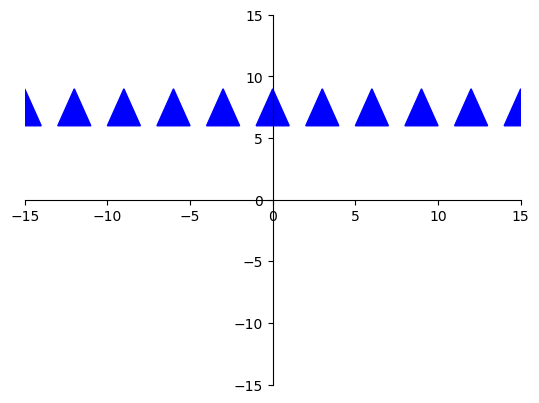

In [85]:
# здесь,на функцию gen_triangle, которая выводит ленту из треугольников, применен декоратор tr_translate, который параллельно переносит нашу ленту на 6 вверх
#gen_triangle - это копия функции из задания 2.2
@tr_translate()
def gen_triangle(length=3, height=3, start=-25, count=100):    
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника,
    # начиная с заданной начальной координаты плюс 2 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника,
    # повторяя значение высоты треугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.


draw_polygons(gen_triangle())

Преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 3  (@tr_rotate)

In [100]:
# Определение функции tr_rotate с аргументом angle по умолчанию равным 30 градусам
def tr_rotate(angle=30):
    # Определение декоратора decorator
    def decorator(f):
        # Определение внутренней функции-обертки wrapper
        def wrapper(*args, **kwargs):
            # Вызов функции f с переданными аргументами и сохранение результата в переменную coordinates
            coordinates = f(*args, **kwargs)
            # Внутренняя функция для вращения точки вокруг начала координат на заданный угол
            def rotate_point(point, angle):
                # Разбиение координат точки на отдельные переменные x и y
                x, y = point
                # Вычисление новых координат точки после вращения
                _x = x * m.cos(m.radians(angle)) - y * m.sin(m.radians(angle))
                _y = x * m.sin(m.radians(angle)) + y * m.cos(m.radians(angle))
                # Возврат новых координат в виде кортежа
                return _x, _y

            # Преобразование угла в радианы
            radians = m.radians(angle)
            # Инициализация списка для хранения вращенных фигур
            _figures = []
            # Перебор каждой фигуры в координатах
            for figure in coordinates:
                _figure = [] # Создание новой фигуры, в которой каждая точка вращается на заданный угол
                for point in figure:
                    # Разбиение координат точки на отдельные переменные x и y
                    x, y = point
                    cos = m.cos(m.radians(angle))
                    # Вычисляем синус угла
                    sin = m.sin(m.radians(angle))
                    # Вычисляем новую x-координату после поворота
                    _x = x * cos - y * sin
                    # Вычисляем новую y-координату после поворота
                    _y = x * sin + y * cos
                    # добавление новых координат в виде кортежа
                    _figure.append((_x, _y))
                _figures.append(_figure)
            # Возврат списка вращенных фигур
            return _figures

        # Возврат внутренней функции-обертки wrapper
        return wrapper

    # Возврат декоратора decorator
    return decorator

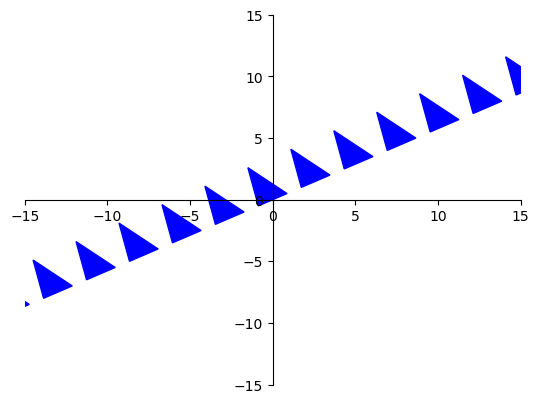

In [103]:
# здесь,на функцию gen_triangle, которая выводит ленту из треугольников, применен декоратор tr_rotate, который поворачивает нашу ленту на 30 градусов
#gen_triangle - это копия функции из задания 2.2
@tr_rotate()
def gen_triangle(length=3, height=3, start=-25, count=100):    
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника,
    # начиная с заданной начальной координаты плюс 2 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника,
    # повторяя значение высоты треугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.


draw_polygons(gen_triangle())

Преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 3  (@tr_simmetry)

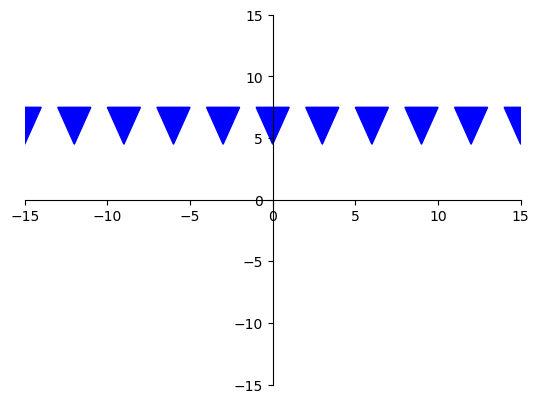

In [107]:
#tr_translate и tr_rotate - копии функций из задания 3
def tr_translate(coordinates, move_y=6, move_x=0):
    # Создаем пустой список fig, в который будем добавлять координаты перемещенных фигур
    fig = []
    # Для каждой фигуры в списке координат
    for figure in coordinates:
        # Распаковываем координаты x и y из текущей фигуры
        x, y = zip(figure)
        # Перемещаем все y-координаты вверх на значение move_y
        y = [_y + move_y for _y in y]
        # Перемещаем все x-координаты вправо на значение move_x
        x = [_x + move_x for _x in x]
        # Для каждой пары (x, y) координат добавляем их в список fig
        for x, y in zip(x, y):
            fig.append((x, y))
    # Возвращаем список fig с перемещенными координатами
    return fig


def tr_rotate(coordinates, angle=30):
    # Создаем пустой список n, в который будем добавлять координаты повернутых точек
    n = []
    # Для каждой точки в списке координат
    for point in coordinates:
        # Распаковываем координаты x и y из текущей точки
        x, y = point
        # Вычисляем косинус угла
        cos = m.cos(m.radians(angle))
        # Вычисляем синус угла
        sin = m.sin(m.radians(angle))
        # Вычисляем новую x-координату после поворота
        _x = x * cos - y * sin
        # Вычисляем новую y-координату после поворота
        _y = x * sin + y * cos
        # Добавляем новую точку с повернутыми координатами в список n
        n.append((_x, _y))
    # Возвращаем список n с повернутыми координатами
    return n


# Определение функции tr_simmetry, принимающей в качестве аргумента другую функцию func
def tr_simmetry(func):
    # Определение внутренней функции-обертки wrapper
    def wrapper():
        # Вызов функции func и сохранение результата в переменной coordinates
        coordinates = func()
        # Создание итератора, который применяет функцию tr_translate к каждой фигуре в coordinates,
        # сдвигая их на -7.5 по вертикали и на 1 по горизонтали
        itr = map(ft.partial(tr_translate, move_y=-7.5), coordinates)
        # Применение функции tr_rotate к каждой фигуре в itr, поворачивая их на 180 градусов
        result = [i for i in map(ft.partial(tr_rotate, angle=180), itr)]
        # Возврат результата
        return result

    # Возврат функции-обертки wrapper
    return wrapper


# здесь,на функцию gen_triangle, которая выводит ленту из треугольников, применен декоратор tr_simmetry, которая паралелит ленту
#gen_triangle - это копия функции из задания 2.2
@tr_simmetry
def gen_triangle(length=3, height=3, start=-25, count=100):    
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника,
    # начиная с заданной начальной координаты плюс 2 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника,
    # повторяя значение высоты треугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.


draw_polygons(gen_triangle())

Преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 3  (@tr_homothety)

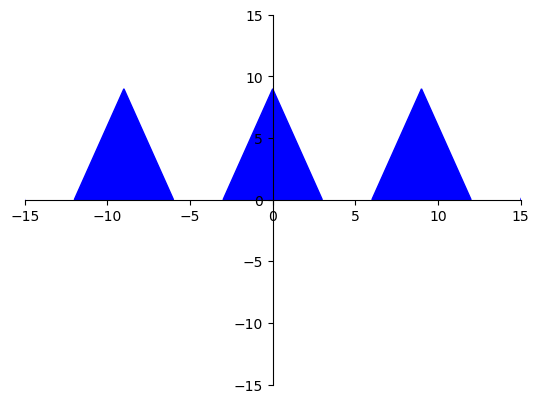

In [113]:
# Определение функции tr_homothety с аргументом k
def tr_homothety(k=3):
    # Определение декоратора decorator
    def decorator(func):
        # Определение внутренней функции-обертки wrapper
        def wrapper(*args, **kwargs):
            # Вызов функции func с переданными аргументами и сохранение результата в переменной coordinates
            coordinates = func(*args, **kwargs)
            # Инициализация списка для хранения преобразованных координат
            coord = []
            # Перебор каждой фигуры в координатах
            for figure in coordinates:
                # Инициализация списка для хранения точек преобразованной фигуры
                n = []
                # Перебор каждой точки внутри фигуры
                for fig in figure:
                    # Разделение координат x и y точек
                    x, y = zip(fig)
                    # Применение гомотетии к координатам x и y, умножая их на коэффициент k
                    x_ = [_x * k for _x in x]
                    y_ = [_y * k for _y in y]
                    # Объединение преобразованных координат x и y в точки и добавление их в список polygon
                    for x, y in zip(x_, y_):
                        n.append(tuple((x, y)))
                # Добавление преобразованной фигуры в список coord
                coord.append(n)
            # Возврат списка преобразованных координат
            return coord

        # Возврат внутренней функции-обертки wrapper
        return wrapper

    # Возврат декоратора decorator
    return decorator

# здесь,на функцию gen_triangle, которая выводит ленту из треугольников, применен декоратор tr_homothety, которая увиличивает каждую фигуру в этой ленте в 3 раза
#gen_triangle - это копия функции из задания 2.2
@tr_homothety()
def gen_triangle(length=3, height=3, start=-25, count=100):    
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника,
    # начиная с заданной начальной координаты плюс 2 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника,
    # повторяя значение высоты треугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.


draw_polygons(gen_triangle())

Фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 5 (@flt_point_inside)

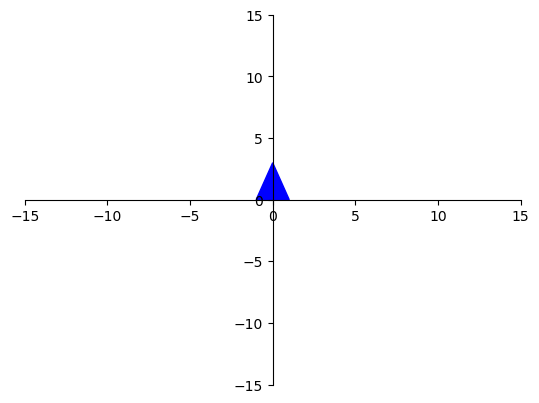

In [114]:
# Определение функции flt_point_inside с аргументом point
def flt_point_inside(point):
    # Определение декоратора decorator
    def decorator(func):
        # Определение внутренней функции-обертки wrapper
        def wrapper(*args, **kwargs):
            # Вызов функции func с переданными аргументами и сохранение результата в переменной coordinates
            coordinates = func(*args, **kwargs)
            # Инициализация списка для хранения координат всех фигур фигур, в которых находится точка
            coord = []
            # Инициализация списка для хранения координат фигур, в которых не находится точка
            coord_all = []
            # Перебор каждой фигуры в координатах
            for figure in coordinates:
                # Проверка, является ли фигура выпуклым многоугольником
                if flt_convex_polygon(figure):
                    # Добавление фигуры в список всех фигур
                    coord_all.append(figure)
                    # Получение координат x и y фигуры
                    x, y = zip(*figure)
                    # Вычисление максимальных и минимальных координат x и y
                    x_max, x_min = max(x), min(x)
                    y_max, y_min = max(y), min(y)
                    # Проверка, находится ли точка внутри фигуры
                    if not (x_min <= point[0] <= x_max and y_min <= point[1] <= y_max):
                        # Если точка не находится внутри фигуры, добавляем фигуру в список coord
                        coord.append(figure)
            # Возврат списка всех фигур, из которых удалены фигуры, в которых находится точка
            return list(set(coord_all) - set(coord))

        # Возврат внутренней функции-обертки wrapper
        return wrapper

    # Возврат декоратора decorator
    return decorator


# здесь,на функцию gen_triangle, которая выводит ленту из треугольников, применен декоратор tr_homothety, которая увиличивает каждую фигуру в этой ленте в 3 раза
#gen_triangle - это копия функции из задания 2.2
@flt_point_inside(point=(0, 0))
def gen_triangle(length=3, height=3, start=-25, count=100):    
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника,
    # начиная с заданной начальной координаты и с шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника,
    # начиная с заданной начальной координаты плюс 1 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника,
    # начиная с заданной начальной координаты плюс 2 и с тем же шагом, равным длине треугольника.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника,
    # повторяя значение высоты треугольника заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника,
    # повторяя значение 0 заданное количество раз.
    # Используем it.islice для ограничения количества координат заданным числом.
    
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.
    # Используем функцию zip для объединения соответствующих координат x и y в кортежи.


draw_polygons(gen_triangle())

### Задание 8
8. Реализовать функции и продемонстрировать их корректность: 

1. поиск угла, самого близкого к началу координат ( agr_origin_nearest );

(1, 1)


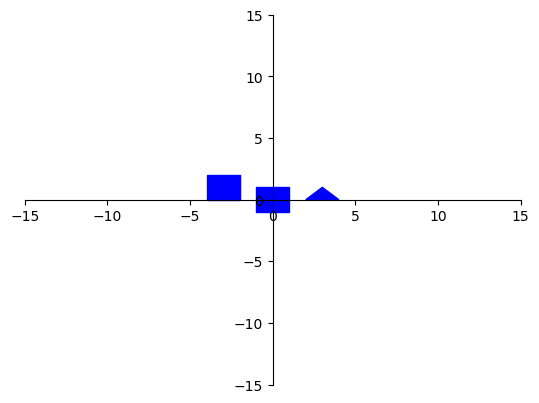

In [62]:
def arg_origin_nearest(angle, coordinates):
    # Если это первый запуск функции, присваиваем ему первые координаты из списка coordinates
    if angle == False:
        angle = coordinates[0]
    # Проходим по каждой паре координат в списке
    for side in coordinates:
        # Сравниваем расстояние от начала координат до текущего angle_coordinates и до side
        if (angle[0]**2 + angle[1]**2) > (side[0]**2 + side[1]**2):
            # Если точка side ближе к началу координат, обновляем angle_coordinates
            angle = abs(side[0]), abs(side[1])
    # Возвращаем координаты ближайшей точки к началу координат
    return angle

# Создаем итератор из кортежей, представляющих наборы координат для разных многоугольников
coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
# Используем функцию reduce из модуля functools для последовательного применения функции arg_origin_nearest
# к элементам итератора coord, начиная с False как начального значения
#reduce помогает использовать функцию, сохраняя значение angle_coordinates в разных запусках функций
# то есть при первом запуске функции angle = False, но потом angle меняется и в следущий раз при запуске функции 
#angle будет равен какому-то числу
print(ft.reduce(arg_origin_nearest, coord, False))
#дальше идет вывод этих фигур, просто чтобы показать, что все верно
coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
draw_polygons(coord)


2. поиск самого длинной стороны многоугольника ( agr_max_side ); 

In [64]:
def arg_max_side(max_side, coordinates):
    # Преобразование кортежа координат в список для возможности добавления элементов
    coordinates = list(coordinates)
    # Добавление первой точки в конец списка, чтобы удобно считать последнее ребро многоугольника
    coordinates.append(coordinates[0])
    # Проходим по всем парам точек, которые образуют стороны многоугольника
    for side in range(len(coordinates) - 1):
        x1, y1 = coordinates[side]
        x2, y2 = coordinates[side + 1]
        # Сравнение длины стороны между точками (x1, y1) и (x2, y2) с текущей максимальной длиной
        if (((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5) > max_side:
            max_side = (((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5)
    # Возвращение наибольшей найденной длины стороны
    return max_side

# Создание итератора с координатами вершин нескольких многоугольников
coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
# Использование функции reduce для нахождения максимальной длины стороны среди всех многоугольников
# в этом случае max_side будет оставатья таким как и в конце предидущего запуска функции
print(ft.reduce(arg_max_side, coord, 0))

2.0


3. поиск самой маленькой площади многоугольника ( agr_min_area );

In [68]:
def arg_min_area(min_area, coordinates):
    # Создаем объект Polygon из координат
    p = Polygon(coordinates)
    # Вычисляем площадь многоугольника
    area = p.area

    # Если min_area еще не инициализирован (равен 0), возвращаем площадь текущего многоугольника
    if min_area == 0:
        return area
    # Если текущая площадь меньше сохраненной min_area, возвращаем area
    elif min_area > area:
        return area
    # Возвращаем текущее минимальное значение площади
    return min_area

# Создание итератора с координатами вершин нескольких многоугольников
coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))

# Использование функции reduce для нахождения минимальной площади среди всех многоугольников
print(ft.reduce(arg_min_area, coord, 0))

1.0


4. расчет суммарного периметра ( agr_perimeter );

In [70]:
def arg_perimeter(all_perimeter, coordinates):
    # Преобразуем кортеж координат в список для удобства работы
    coordinates = list(coordinates)
    # Добавляем первую точку в конец списка для замыкания многоугольника
    coordinates.append(coordinates[0])
    # Перебираем пары соседних точек
    for side in range(len(coordinates) - 1):
        x1, y1 = coordinates[side]
        x2, y2 = coordinates[side + 1]
        # Вычисляем расстояние между точками (длину одной из сторон) и добавляем к текущему периметру
        all_perimeter += (((x2 - x1) ** 2) + (y2 - y1) ** 2) ** 0.5
    return all_perimeter

# Создаем итератор с наборами координат вершин трех многоугольников
coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (6, 3), (10, 0))
))
# Используем функцию reduce для подсчета суммарного периметра всех многоугольников
print(ft.reduce(arg_perimeter, coord, 0))

34.0


5. расчет суммарной площади ( agr_area ).

In [71]:
def agr_area(all_area, coordinates):
    # Добавляем площадь текущего многоугольника к общей площади
    return all_area + Polygon(coordinates).area

# Создаем итератор с координатами вершин нескольких многоугольников
coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))

# Используем функцию reduce для нахождения общей площади всех многоугольников
print(ft.reduce(agr_area, coord, 0))

9.0
